In [1]:
# -------------------------------
# Step 1: Import Required Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# -------------------------------
# Step 2: Load and Clean Dataset
# -------------------------------
df = pd.read_csv("Salary_dataset.csv")

In [3]:
# Remove unnecessary column
df.drop(columns=["Unnamed: 0"], inplace=True)

In [4]:
# Rename columns properly
df.rename(columns={'YearsExperience': 'Experience'}, inplace=True)

In [5]:
display(df.head())

,Experience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


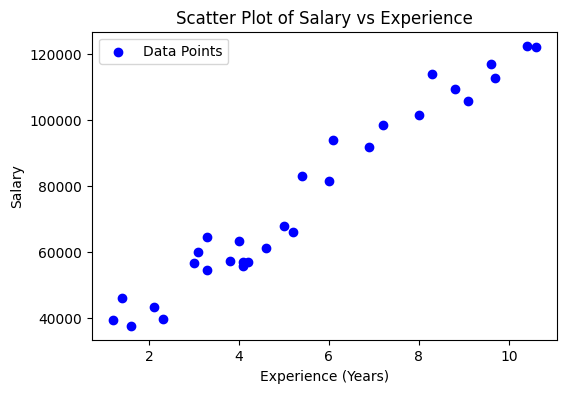

In [6]:
# -------------------------------
# Step 3: Data Visualization
# -------------------------------
plt.figure(figsize=(6,4))
plt.scatter(df["Experience"], df["Salary"], color='blue', label="Data Points")
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title("Scatter Plot of Salary vs Experience")
plt.legend()
plt.show()


📊 Correlation Matrix:
            Experience    Salary
Experience    1.000000  0.978242
Salary        0.978242  1.000000


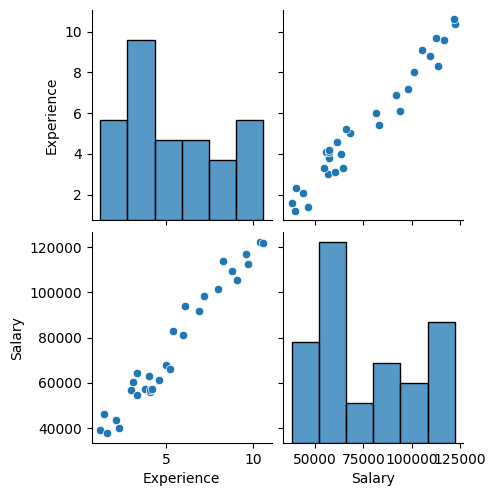

In [7]:
# -------------------------------
# Step 4: Check Correlation
# -------------------------------
print("\n📊 Correlation Matrix:")
print(df.corr())

sns.pairplot(df)
plt.show()

In [8]:
# -------------------------------
# Step 5: Define X (Features) and y (Target)
# -------------------------------
X = df[['Experience']]     # Independent variable
y = df['Salary']           # Dependent variable

In [9]:
# -------------------------------
# Step 6: Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print("\nTrain Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


Train Shape: (22, 1)
Test Shape: (8, 1)


In [10]:
# -------------------------------
# Step 7: Feature Scaling
# -------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# -------------------------------
# Step 8: RidgeCV Model Training
# -------------------------------
ridgecv = RidgeCV(cv=5)  # 5-fold cross-validation
ridgecv.fit(X_train_scaled, y_train)

,alphas,"(0.1, ...)"
,fit_intercept,True
,scoring,None
,cv,5
,gcv_mode,None
,store_cv_results,False
,alpha_per_target,False


In [12]:
# -------------------------------
# Step 9: Predictions
# -------------------------------
y_pred = ridgecv.predict(X_test_scaled)

In [13]:
# -------------------------------
# Step 10: Model Evaluation
# -------------------------------
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [14]:
print("\n📈 Model Evaluation:")
print("Mean Absolute Error:", mae)
print("R² Score:", r2)
print("Best Alpha chosen by RidgeCV:", ridgecv.alpha_)


📈 Model Evaluation:
Mean Absolute Error: 5098.9164044943955
R² Score: 0.9341570808135129
Best Alpha chosen by RidgeCV: 0.1


d:\Skills\Machine Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


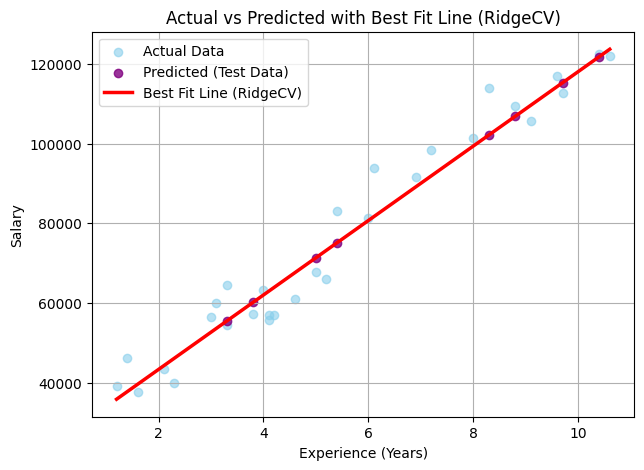

In [15]:
# -------------------------------
# Step 11: Scatter Plot (Actual vs Predicted): Actual Data, Predicted Points, and Best Fit Line
# -------------------------------
plt.figure(figsize=(7,5))

# Actual data points (entire dataset)
plt.scatter(X, y, color='skyblue', label="Actual Data", alpha=0.6)

# Predicted points (test set)
plt.scatter(X_test, y_pred, color='purple', label="Predicted (Test Data)", alpha=0.8)

# Sorted X for smooth line
X_sorted = np.sort(X['Experience']).reshape(-1, 1)  # reshape for scaler
X_sorted_scaled = scaler.transform(X_sorted)
y_line = ridgecv.predict(X_sorted_scaled)

# Best fit line
plt.plot(X_sorted, y_line, color='red', linewidth=2.5, label="Best Fit Line (RidgeCV)")

# Labels and formatting
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.title("Actual vs Predicted with Best Fit Line (RidgeCV)")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# -------------------------------
# Step 12: Model Parameters
# -------------------------------
print("\n⚙️ RidgeCV Model Parameters:")
print(ridgecv.get_params())


⚙️ RidgeCV Model Parameters:
{'alpha_per_target': False, 'alphas': (0.1, 1.0, 10.0), 'cv': 5, 'fit_intercept': True, 'gcv_mode': None, 'scoring': None, 'store_cv_results': False}


In [17]:
# -------------------------------
# Step 13: Predict for New Data (Example: 5 Years Experience)
# -------------------------------
new_exp = pd.DataFrame([[5]], columns=['Experience'])
new_exp_scaled = scaler.transform(new_exp)
predicted_salary = ridgecv.predict(new_exp_scaled)[0]

print("\n💰 Predicted Salary for 5 Years of Experience:", predicted_salary)


💰 Predicted Salary for 5 Years of Experience: 71392.6732078006
